# Basicos
## Simbolos
1. Para poder usar variables, hay que definirlas usando *symbols*, sin embargo, si utilizas el *import init_session*, se ejecutan automaticamente algunos comandos (quiet = True evita que se haga el display de los comandos ejecutados) Como nota, el import * nos ahorra tener que colocar sp antes de las funciones a ocupar:

In [3]:
# import sympy as sp
from sympy import init_session
init_session(quiet=False)
x = symbols("x")
x + 1

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



2. Se pueden definir multiples variables:

In [59]:
x ,y ,z = symbols("x, y, z")

In [4]:
expr = cos(x)+1
expr.subs(x,y)

## Sustituciones

1. Se usa la expresion *subs* para sustituir.

In [5]:
expr = cos(x)
expr.subs(x,0)

2. Tambien podemos pasar varias sustituciones por medio de una lista.

In [6]:
expr = x**3+4*x*y-z
expr.subs([(x,2),(y,4),(z,0)])

3. *evalf* convierte una funcion numerica en un numero de tipo float. Regresa por default 15 digitos.


In [19]:
expr = sqrt(8)
expr.evalf()

4. Para evaluar funciones en varios puntos se usa la funcion *lambdify*. Se recomienda usar NumPy para conseguir exactitud.

In [21]:
import numpy as np
a = np.arange(10)
expr = sin(x)
f = lambdify(x, expr, "numpy")
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

## Simplificaciones 

1. *simplify* se utiliza solo para reducir una expresion a una forma mas simple.

In [7]:
simplify(sin(x)**2+cos(x)**2)

In [8]:
simplify((x**3+x**2-x-1)/(x**2+2*x+1))

2.*expand* se utiliza para expandir expresiones polinominales.

In [9]:
expand((x+1)**2)

In [10]:
expand((x+1)*(x-2)-(x-1)*x)

3. *factor* toma un polinomio y lo simplifica a factores irreducibles. Es el opuesto de *expand*.

In [11]:
factor(x**3-x**2+x-1)

In [12]:
factor(2*x**2+7*x-4)

In [13]:
factor(x**2*z+4*x*y*z+4*y**2*z)

In [14]:
factor_list(x**2*z+4*x*y*z+4*y**2*z)

4. Ejemplos extra.

In [15]:
expand((cos(x)+sin(x))**2)

In [16]:
factor(sin(x)**2+2*sin(x)*cos(x)+cos(x)**2)

5. *collect* ordena los poderes comunes en los terminos de una expresion.

In [17]:
expr = x*y+x-3+2*x**2-z*x**2+x**3
expr

In [18]:
collected_expr = collect(expr,x)
collected_expr

6. *apart* realiza una descomposicion por fracciones parciales de una funcion racional.

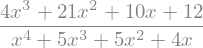

In [19]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

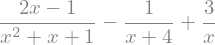

In [20]:
apart(expr)

7. *trigsimp* simplifica expresiones trigonometricas usando idetnidades trigonometricas

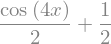

In [21]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

8. *expandtrig* aplica idetnidades para expandir la funcion. Contrario a *trigsimp*.

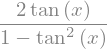

In [22]:
expand_trig(tan(2*x))

9. *powsimp* simplifica exponentes.

In [23]:
a, b = symbols("a,b", real= True)
powsimp(x**a*x**b)

In [24]:
powsimp(x**a*y**a, force = True)

9. *powdenest* aplica para simplificar exponentes elevados a algun otro exponente.

In [25]:
powdenest((x**a)**b, force = True)

## Derivadas

1. Para derivar se usa la funcion *diff*


In [26]:
diff(cos(x),x)

In [27]:
diff(exp(x**2),x)

In [28]:
expr = 5*x*y**2*z**3
expr.diff(x,y,z)

2. Para escribir una derivada sin resolverla, se puede hacer lo siguiente:


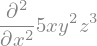

In [29]:
deriv = Derivative(expr,x,2)
deriv

3. Tambien se puede hacer usando LaTeX, pero esta no se puede evaluar despues.

$$\frac{\partial^2}{\partial x^2}5xy^2z^3$$

Si queremos evaluar una derivada no evaluada, se usa el metodo doit.

In [30]:
deriv.doit()

## Integrales 

1. Para una integral indefinida, se hace lo siguiente.

In [32]:
integrate(cos(x), x)

2. Para integrales definidas, se hace lo siguiente.

In [33]:
integrate(exp(-x),(x,0,oo))

3. Para escribir integrales sin evaluarlas.

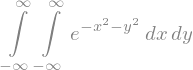

In [8]:
integ = Integral(exp(-(x**2+y**2)),(x,-oo,oo),(y,-oo,oo))
integ

4. Tambien se puede hacer usando LaTeX.

$$\int_{-\infty}^{\infty} e^{-x^2-y^2}dx dy$$

In [9]:
integ.doit()

## Limites

1. Para los limites, se usa la funcion *limit*.

In [5]:
limit(sin(x)/x,x,0)

2. Para escribir un limite sin evaluar, se usa *Limit*

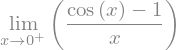

In [9]:
lim = Limit((cos(x)-1)/x,x,0)
lim

3. Tambien se puede hacer el texto utilizando LaTeX. 

$$\lim_{x \to 0}\frac{cos(x)-1}{x}$$

4. Podemos evaluar el limite despues.

In [10]:
lim.doit()

## Solucionar sistemas de ecuaciones

1. Cuando solo es una ecuacion, se puede utilizar *solveset*.

In [30]:
#Si no esta igualada a cero:
solveset(Eq(x**2,1),x)

In [31]:
#Si esta igualada a cero:
solveset(x**2-1,x)

2.  Para sistemas de ecuaciones lineales, se utiliza *linsolve*.

In [34]:
#En forma de ecuaciones:
linsolve([x+y+z-1,x+y+2*z-3],(x,y,z))

In [35]:
#En forma de matriz aumentada:
linsolve(Matrix(([1,1,1,1],[1,1,2,3])),(x,y,z))

3. Para sistemas no lineales, se utiliza *nonlinsolve*.

In [36]:
#Cuando solo hay soluciones reales:
nonlinsolve([x**2+x,x-y], (x,y))

In [40]:
#Cuando solo hay soluciones complejas:
nonlinsolve([x**2+1,y**2+1],(x,y))

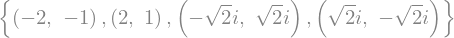

In [41]:
#Con soluciones mixtas:
system = [x**2-2*y**2-2,x*y-2]
var = (x,y)
nonlinsolve(system,var)

In [42]:
#Para obtener las racies:
roots(x**3-6*x**2+9*x,x)

## Ecuaciones diferenciales 

1. Como ya se definieron los simbolos y su tipo, solo queda definir la ec. dif.

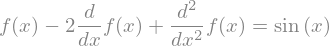

In [51]:
diffeq = Eq(f(x).diff(x, 2) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

2. Para resolver la EDO se utiliza *dsolve*.

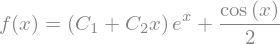

In [52]:
dsolve(diffeq,f(x))